In [10]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt



In [17]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1. Information of the data

In [13]:
# Checking null values through .null() method.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Statistical Analysis
    
    Method 1: df.describe(): It gives descriptive overview of the data. Like count, mean, standard deviation, min, max, etc.,

    

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Check the Outliers

Outliers: In the information evaluation context, these are information points that deviate significantly from the observations in the dataset. These anamolies can show up as surprisingly high or low values, "disrupting the distribution of data". 

    For example, In a dataset of monthly sales figures, if the income for one month are extensively higher than the sales for all of the different months, that high sales determine would be considered an outlier.

    There will be lot of impact on "analysis, statistical significance" because of outliers. Removing outliers can help ensure the analysis is based totally on a more representative sample of the information. And when appropriate can assist maintain the statistical importance of the analysis.

To find the outliers in aThe IQR method identifies potential outliers as values falling below : Q1-1.5 * IQR, or above Q3+1.5*IQR.


After applying the statistical method pregnancies, insulin columns has outliers.

Lets plot the boxplot for each column to find the outliers visually.

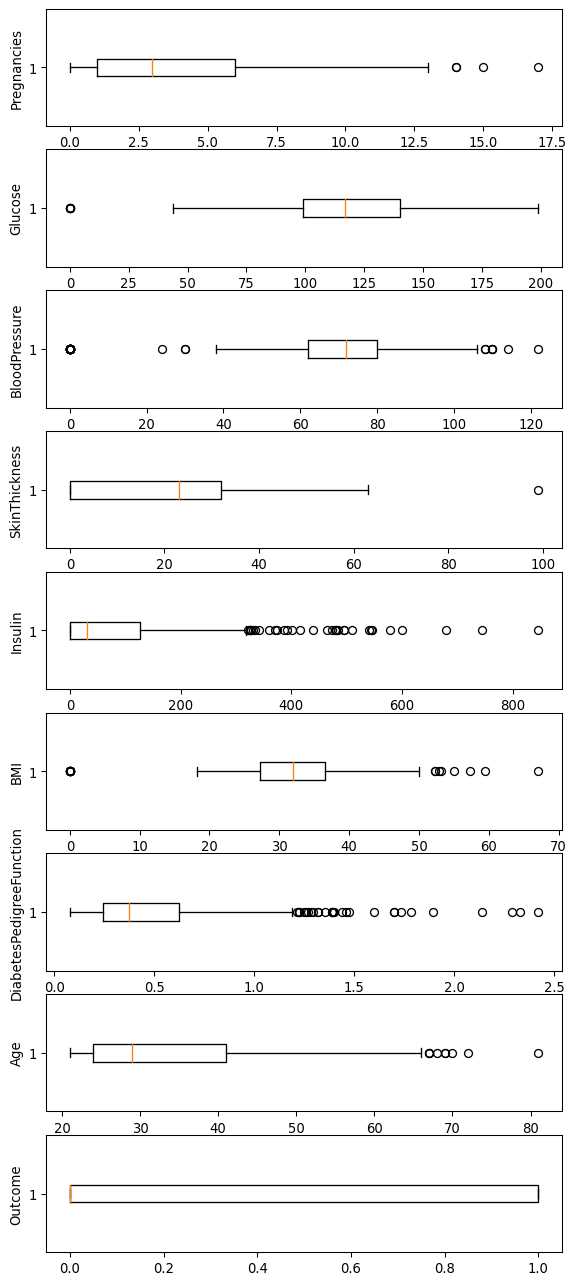

In [15]:
fig, axs  = plt.subplots(9,1, dpi = 95, figsize = (7,17))
i = 0
for column in df.columns:
    axs[i].boxplot(df[column], vert = False)
    axs[i].set_ylabel(column)
    i+=1
plt.show()


Feature- Specific Analysis:

Pregnancies:

    -> The boxplot shows a long whisker on the upper side and several outliers (dots) above the upper whisker.

    -> Values like 14, 15, 17 are flagged as outliers.

    -> Suggests that while most pregnancies are within a reasonable range, some individuals have exceptionally high pregnancy counts.

Glucose:

    -> There is a single outlier on the lower side (0).

    -> Glucose cannot be zero in a physiological sense, so this point is likely an error or missing value that needs correction.

BloodPressure:

    -> Several outliers on both the lower (0) and upper sides (above ~100).

    -> A blood pressure of zero is not physiologically possible, suggesting missing or invalid data.

    -> The upper outliers (above ~110) might represent hypertensive cases but could be valid depending on the dataset context.

SkinThickness:

    -> There is one outlier on the upper side (near 100).

    -> Most of the data is tightly clustered within the box (Q1 to Q3).

    -> A value of 0 (not shown here as an outlier) may also represent missing data for this feature.

Insulin:

    -> Significant number of outliers on the upper side (above ~300).

    -> The long tail of outliers suggests that some individuals have exceptionally high insulin levels (e.g., 600, 800+), which might indicate extreme cases of diabetes or measurement errors.

BMI:

    -> A single lower outlier (0) is flagged, which is physiologically impossible.

    -> Several upper outliers (above ~50) are also visible, indicating individuals with obesity or extreme BMI values.

DiabetesPedigreeFunction:

    -> A cluster of outliers on the upper side (above ~1.2).

    -> The pedigree function indicates genetic predisposition to diabetes, so higher values might represent extreme genetic factors.

Age:

    -> Some upper outliers (above ~66).

    -> These might be older individuals in the dataset. Depending on the context, they may not require removal as they could be valid cases.

Outcome:

    -> The "Outcome" boxplot shows no variability (binary classification: 0 or 1).

    -> No outliers exist, as this is a categorical variable.




4. Drop the Outliers

In [16]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #Define the bounds for outliers 

    lower_bound = Q1- 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #To drop rows with outliers
    df_remove_outliers = df[(df[column] >= lower_bound) & (df[column]<= upper_bound)]
    return df_remove_outliers
for column in df.columns:
    df =drop_outliers_iqr(df, column)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


5. Correlation

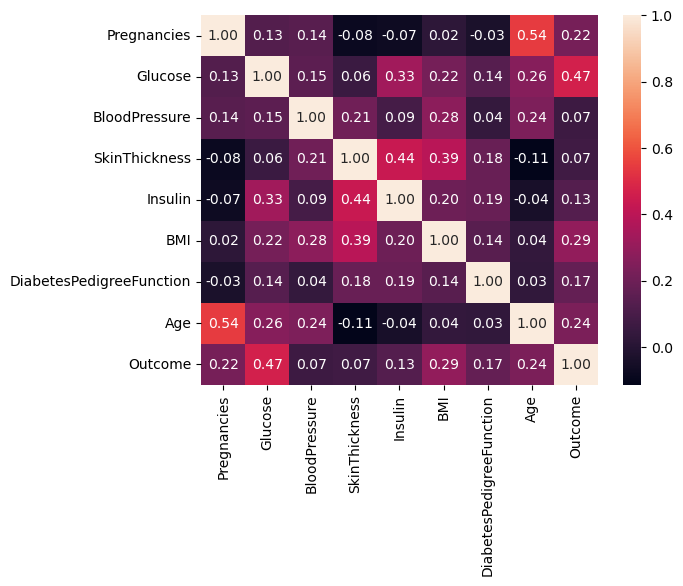

In [22]:
import seaborn as sns
correlation = df.corr()
#plt.figure(dpi = 130)

sns. heatmap(correlation, annot = True, fmt = '.2f')
plt.show()


Observations:

Highest Positive Correlation with Outcome:

  Glucose (0.47): Strongest positive correlation with the Outcome variable.

  BMI (0.29) and Age (0.24) also show a moderate positive correlation.

Moderate Correlation:

  Insulin and SkinThickness (0.44): Indicates that individuals with higher insulin levels may have thicker skin folds.

Low or No Correlation:

  Pregnancies and Insulin (-0.07): Weak negative correlation.

  Age and SkinThickness (-0.11): Negative correlation 
  suggests thinner skinfolds in older individuals.

Feature Relationships:

  Pregnancies and Age (0.54): Indicates older individuals tend to have more pregnancies.


In [23]:
correlation['Outcome'].sort_values(ascending = False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

6. Check Outcomes Proportionality

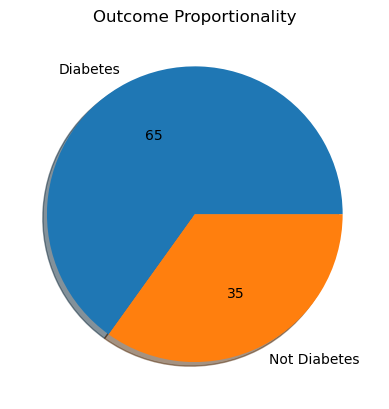

In [24]:
plt.pie(df.Outcome.value_counts(),labels=['Diabetes', 'Not Diabetes'], autopct = '%.f', shadow = True)
plt.title('Outcome Proportionality')
plt.show()

7. Separate Independent features and Target Variables

In [25]:
X = df.drop(columns= ['Outcome'])
Y = df.Outcome

8. Normalization and Standardization

Normalization and standardization are essential techniques in data preprocessing to rescale features, ensuring models can learn effectively without being biased by varying feature scales. 

In [30]:
# Initializing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range = (0,1))

rescaledX = scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [31]:
scaler = StandardScaler(). fit(X)
rescaledX = scaler.transform(X)
rescaledX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

From the above values we can see that, dataset (Pregnancies, Glucose, BloodPressure, etc.), features like Glucose range from 0 to 199, while BMI ranges from 0 to 67.1. Such disparities can negatively impact machine learning algorithms, especially distance-based models (e.g., k-NN, SVM) or gradient-based models (e.g., neural networks).